<a href="https://colab.research.google.com/github/Yuito-K/risawa/blob/main/SVM_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVMを用いたIris データセットの分類と可視化

## 環境設定とデータ準備

In [42]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# データセットの読み込みと前処理
iris = load_iris()
X, y = iris.data, iris.target

# データ分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# データの標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## SVMモデルの構築と評価

In [43]:
def train_and_evaluate_svm(X_train, X_test, y_train, y_test, kernel, C=1.0, degree=3, gamma='scale'):
    if kernel == 'poly':
        svm = SVC(kernel=kernel, C=C, degree=degree, gamma=gamma)
    else:
        svm = SVC(kernel=kernel, C=C, gamma=gamma)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Kernel: {kernel}, Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    return svm

# 異なるカーネルでSVMを訓練・評価
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    train_and_evaluate_svm(X_train_scaled, X_test_scaled, y_train, y_test, kernel)

Kernel: linear, Accuracy: 0.97
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

Kernel: poly, Accuracy: 0.89
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.76      1.00      0.87        13
           2       1.00      0.69      0.82        13

    accuracy                           0.89        38
   macro avg       0.92      0.90      0.89        38
weighted avg       0.92      0.89      0.89        38

Kernel: rbf, Accuracy: 0.95
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.92      0.

## ハイパーパラメータCの影響分析

C: 0.001, Accuracy: 0.32
C: 0.01, Accuracy: 0.32
C: 0.1, Accuracy: 0.87
C: 1, Accuracy: 0.95
C: 10, Accuracy: 0.97
C: 100, Accuracy: 0.95


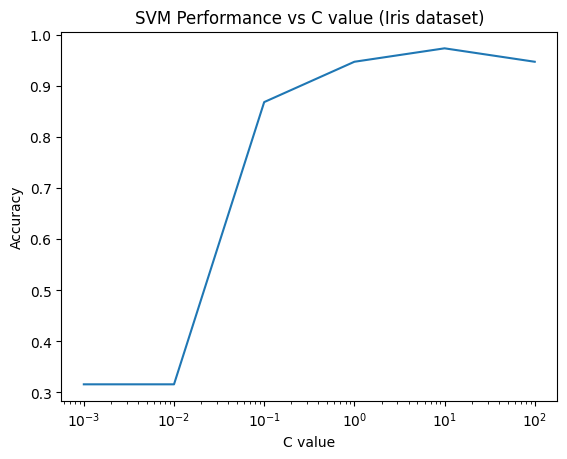

In [44]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
accuracies = []

for C in C_values:
    svm = SVC(kernel='rbf', C=C)
    svm.fit(X_train_scaled, y_train)
    y_pred = svm.predict(X_test_scaled)
    score = accuracy_score(y_test, y_pred)
    print(f"C: {C}, Accuracy: {score:.2f}")
    accuracies.append(score) # この後の可視化のため，正解率をストック

# 一応可視化
plt.plot(C_values, accuracies)
plt.xscale('log')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.title('SVM Performance vs C value (Iris dataset)')
plt.show()

In [45]:
from sklearn.datasets import fetch_olivetti_faces

# データセット取得
faces = fetch_olivetti_faces(shuffle=True)
X, y = faces.data, faces.target

In [46]:
# prompt: テスト=75:25 に分割

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# データ分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# データの前処理（標準化）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
# prompt: scikit-learnのSVCクラスを用いて線形SVMを実装

# SVCクラスを用いた線形SVMの実装
# 線形カーネルを指定してSVCを初期化
svm_linear = SVC(kernel='linear', C=1.0)

# 訓練データでモデルを学習
svm_linear.fit(X_train_scaled, y_train)

# テストデータで予測
y_pred_linear = svm_linear.predict(X_test_scaled)

# モデルの評価
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Linear SVM Accuracy: {accuracy_linear:.2f}")
print(classification_report(y_test, y_pred_linear))

Linear SVM Accuracy: 0.95
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       0.67      0.67      0.67         3
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


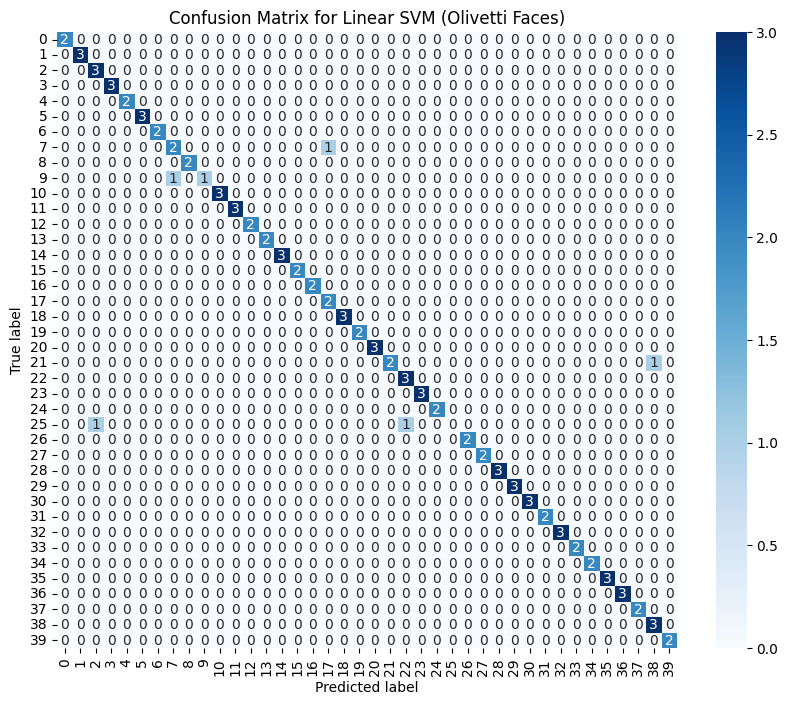

In [49]:
# prompt: 混同行列を作成し，分類性能を可視化

import matplotlib.pyplot as plt
import seaborn as sns

# 混同行列の計算
cm = confusion_matrix(y_test, y_pred_linear)

# 混同行列の可視化
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Linear SVM (Olivetti Faces)')
plt.show()

Polynomial SVM Accuracy: 0.56
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       1.00      1.00      1.00         2
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         2
           7       1.00      0.67      0.80         3
           8       1.00      0.50      0.67         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         3
          11       1.00      0.67      0.80         3
          12       0.00      0.00      0.00         2
          13       1.00      0.50      0.67         2
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00        

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


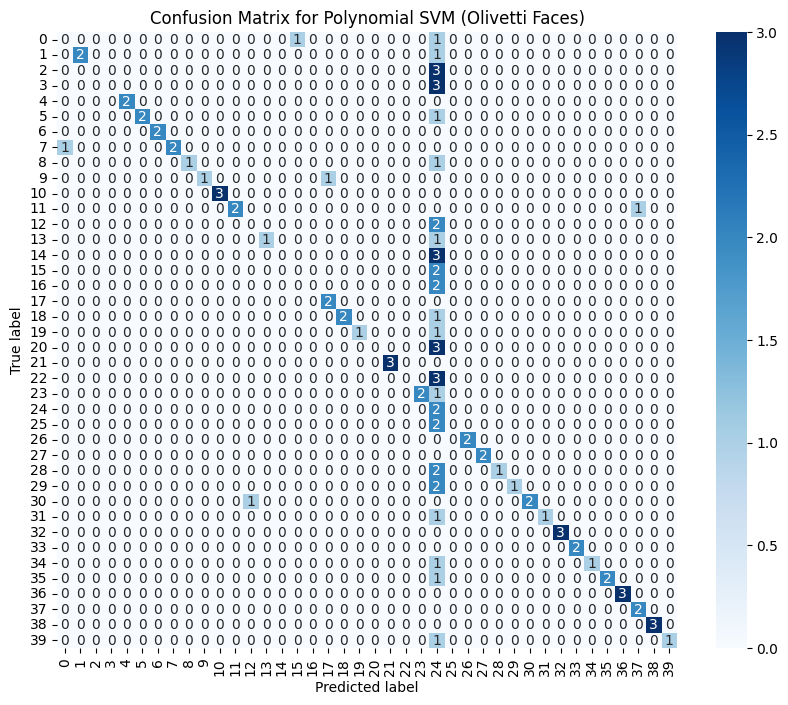

RBF SVM Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       1.00      0.33      0.50         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       0.67      0.67      0.67         3
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          16       1.00      0.50      0.67         2
    

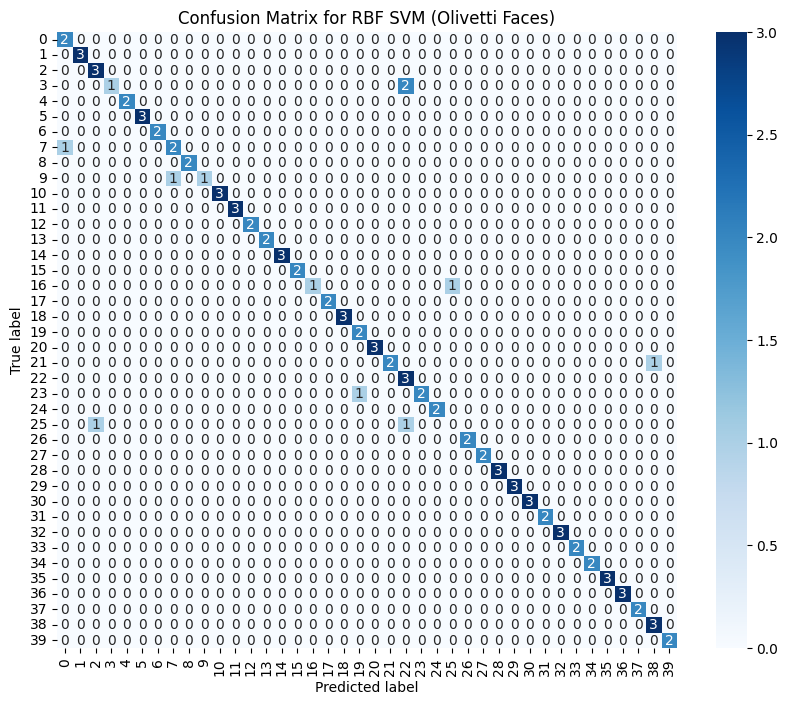

In [50]:
# prompt: 線形カーネル，多項式カーネル，RBFカーネルを使用してSVMを実装

import matplotlib.pyplot as plt
# ポリカーネルを指定してSVCを初期化
# degreeパラメータで多項式の次数を指定します
svm_poly = SVC(kernel='poly', degree=3, C=1.0, gamma='scale')

# 訓練データでモデルを学習
svm_poly.fit(X_train_scaled, y_train)

# テストデータで予測
y_pred_poly = svm_poly.predict(X_test_scaled)

# モデルの評価
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f"Polynomial SVM Accuracy: {accuracy_poly:.2f}")
print(classification_report(y_test, y_pred_poly))

# 混同行列の計算
cm_poly = confusion_matrix(y_test, y_pred_poly)

# 混同行列の可視化
plt.figure(figsize=(10, 8))
sns.heatmap(cm_poly, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Polynomial SVM (Olivetti Faces)')
plt.show()

# RBFカーネルを指定してSVCを初期化
# gammaパラメータはカーネルの幅を制御します
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')

# 訓練データでモデルを学習
svm_rbf.fit(X_train_scaled, y_train)

# テストデータで予測
y_pred_rbf = svm_rbf.predict(X_test_scaled)

# モデルの評価
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"RBF SVM Accuracy: {accuracy_rbf:.2f}")
print(classification_report(y_test, y_pred_rbf))

# 混同行列の計算
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

# 混同行列の可視化
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for RBF SVM (Olivetti Faces)')
plt.show()


多項式カーネルの制度だけ著しく低い結果となった。原因としてモデル２４の人の顔が原因だと考えられる。他のモデルと比較してみて口ひげが立派で口元がひげで隠れていることが要因の一つだと考えた。残り二つはどちらも高精度だった。

--- Olivetti Faces dataset ---
C: 0.1, Accuracy: 0.36
C: 10, Accuracy: 0.93
C: 100, Accuracy: 0.93


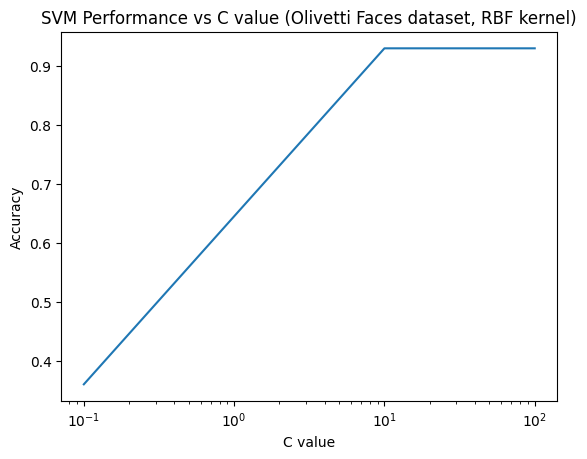


--- Iris dataset ---
C: 0.1, Accuracy: 0.36
C: 10, Accuracy: 0.93
C: 100, Accuracy: 0.93


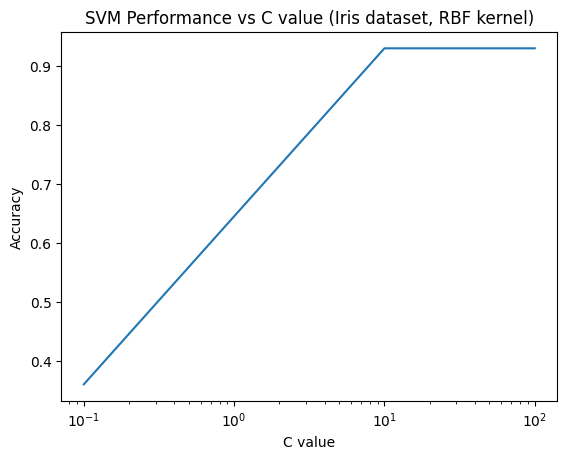

In [53]:
# prompt: RBFカーネルを用いて正則化パラメータ C の値を [0.1, 10, 100] と変えて，モデルの性能がどのように変化するか分析

import matplotlib.pyplot as plt
# Olivetti Faces データセットを用いたRBFカーネルのC値による影響分析
print("--- Olivetti Faces dataset ---")
C_values_olivetti = [0.1, 10, 100]
accuracies_olivetti = []

for C in C_values_olivetti:
    # RBFカーネルを指定してSVCを初期化
    svm_rbf_olivetti = SVC(kernel='rbf', C=C, gamma='scale')

    # 訓練データでモデルを学習
    svm_rbf_olivetti.fit(X_train_scaled, y_train)

    # テストデータで予測
    y_pred_rbf_olivetti = svm_rbf_olivetti.predict(X_test_scaled)

    # モデルの評価
    score = accuracy_score(y_test, y_pred_rbf_olivetti)
    print(f"C: {C}, Accuracy: {score:.2f}")
    accuracies_olivetti.append(score)

# 可視化
plt.plot(C_values_olivetti, accuracies_olivetti)
plt.xscale('log')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.title('SVM Performance vs C value (Olivetti Faces dataset, RBF kernel)')
plt.show()

# Iris データセットを用いたRBFカーネルのC値による影響分析
print("\n--- Iris dataset ---")
C_values_iris = [0.1, 10, 100]
accuracies_iris = []

# Irisデータセットの準備（既に前処理済み）
# X_train_scaled, X_test_scaled, y_train, y_test は前の方で計算されています

for C in C_values_iris:
    # RBFカーネルを指定してSVCを初期化
    svm_rbf_iris = SVC(kernel='rbf', C=C, gamma='scale')

    # 訓練データでモデルを学習
    svm_rbf_iris.fit(X_train_scaled, y_train)

    # テストデータで予測
    y_pred_rbf_iris = svm_rbf_iris.predict(X_test_scaled)

    # モデルの評価
    score = accuracy_score(y_test, y_pred_rbf_iris)
    print(f"C: {C}, Accuracy: {score:.2f}")
    accuracies_iris.append(score)

# 可視化
plt.plot(C_values_iris, accuracies_iris)
plt.xscale('log')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.title('SVM Performance vs C value (Iris dataset, RBF kernel)')
plt.show()

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# チューニングしたいハイパーパラメータの範囲を定義 (ユーザー指定の値に変更)
param_grid = {'C': [1, 10, 100],
              'gamma': ['scale', 0.001, 0.01, 0.1, 1]}

# RBFカーネルを用いたSVCモデルを準備
svm_rbf = SVC(kernel='rbf')

# GridSearchCVを用いて最適なハイパーパラメータを探索
# cv=5 は5分割交差検証を意味します
grid_search = GridSearchCV(svm_rbf, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# 最適なハイパーパラメータとスコアを表示
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)
print("Best cross-validation score:")
print(grid_search.best_score_)

# 最適なモデルでテストデータを評価
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test_scaled)

print("\nTest set performance with best parameters:")
print(classification_report(y_test, y_pred_best, zero_division=0))

Best parameters found by GridSearchCV:
{'C': 10, 'gamma': 'scale'}
Best cross-validation score:
0.95

Test set performance with best parameters:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       0.67      0.67      0.67         3
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00 